<a href="https://colab.research.google.com/github/biplobsd/ImageClassificationTest/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://drive.google.com/u/1/uc?id=1qCEMkJPz7kVJ4n160gBYNU36Er-Tx0xc&export=download

Downloading...
From: https://drive.google.com/u/1/uc?id=1qCEMkJPz7kVJ4n160gBYNU36Er-Tx0xc
To: /content/Mini Dataset.zip
100% 17.8M/17.8M [00:00<00:00, 100MB/s] 


In [ ]:
!unzip /content/Mini\ Dataset.zip

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Mini Dataset'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/Mini Dataset/*')

In [ ]:
folders

['/content/Mini Dataset/Indian',
 '/content/Mini Dataset/East Asian',
 '/content/Mini Dataset/Southeast Asian']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical', subset='training')

Found 2400 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical', subset='validation')

Found 600 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
75/75 [==============================] - 57s 565ms/step - loss: 3.6334 - accuracy: 0.4392 - val_loss: 3.0203 - val_accuracy: 0.4967
Epoch 2/10
75/75 [==============================] - 39s 520ms/step - loss: 2.2952 - accuracy: 0.5446 - val_loss: 2.2695 - val_accuracy: 0.5450
Epoch 3/10
75/75 [==============================] - 39s 517ms/step - loss: 1.9850 - accuracy: 0.6029 - val_loss: 3.8808 - val_accuracy: 0.5233
Epoch 4/10
75/75 [==============================] - 39s 516ms/step - loss: 1.9635 - accuracy: 0.6125 - val_loss: 3.1433 - val_accuracy: 0.4733
Epoch 5/10
75/75 [==============================] - 39s 516ms/step - loss: 1.8242 - accuracy: 0.6479 - val_loss: 3.2396 - val_accuracy: 0.5333
Epoch 6/10
75/75 [==============================] - 39s 518ms/step - loss: 1.8839 - accuracy: 0.6367 - val_loss: 2.7046 - val_accuracy: 0.5367
Epoch 7/10
75/75 [==============================] - 39s 520ms/step - loss: 1.7688 - accuracy: 0.6908 - val_loss: 2.9172 - val_accuracy: 0.5383

In [ ]:
import matplotlib.pyplot as plt

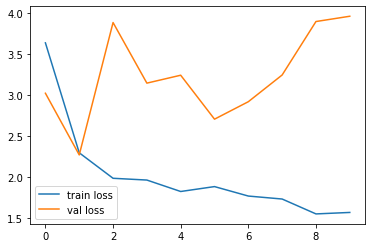

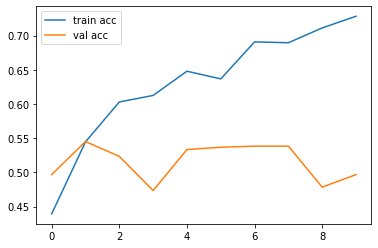

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
len(test_set)

19

In [ ]:
y_pred

array([[3.1264224e-03, 8.2145154e-04, 9.9605221e-01],
       [7.7237514e-09, 4.1288271e-04, 9.9958712e-01],
       [4.7338486e-05, 8.4518123e-01, 1.5477142e-01],
       ...,
       [8.2066797e-02, 6.5367974e-02, 8.5256529e-01],
       [9.7851229e-01, 2.1331498e-02, 1.5615612e-04],
       [4.7807521e-07, 4.1197907e-04, 9.9958760e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred